# Data Explorer ##

In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from astropy.table import Table
from astropy.visualization import (ManualInterval, LogStretch,
                                   ImageNormalize, MinMaxInterval)
%matplotlib inline

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.size': 5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
# My own adds to Carles' rcParams updates
#plt.rcParams.update({'lines.markersize': 8}) 6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})

## Inport data ##

In [3]:
path = "Data/HECTOMAP_calibrated.fits"
hectomap = fits.open(path)
hectomap.info()

Filename: Data/HECTOMAP_calibrated.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    194   984585R x 93C   [K, K, D, D, D, D, L, E, E, E, E, L, D, D, L, E, E, E, E, E, E, E, L, E, E, L, E, E, L, E, E, L, E, E, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, D, D, L, E, E, E, E, E, D, E, E, E, E, E, E, L, J, J, L, L, L, L, L, I, I, I, I, I, L, L, L, E, D, D, D, D]   


In [4]:
dat = Table.read(path, format='fits')
df = dat.to_pandas()

In [6]:
df['merge_peak_i']

0         True
1         True
2         True
3         True
4         True
          ... 
984580    True
984581    True
984582    True
984583    True
984584    True
Name: merge_peak_i, Length: 984585, dtype: bool

## Some recurring functions ##

In [5]:
def make_hist(x_name, x_bins, x_label, y_label, x_scale, y_scale):
    ''' 
    Make a histogram of one object.
    
    Keyword arguments:
    x_name: string of column name
    bins: int or array of cutoffs
    x_label: string of x axis label
    y_label: string of y axis label
    x_scale: string of x axis scale
    y_scale: string of y axis scale
    '''
    
    fig, axes = plt.subplots(1, 1)
    x_hist = axes.hist(df[x_name], bins=x_bins, histtype='step', linewidth=2, label=x_label)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_xscale(x_scale)
    axes.set_yscale(y_scale)
    return

This function below is buggie, check again

In [21]:
def scatter_mean(x_name, y_name, x_bins, x_group):
    '''
    Generate a scatter plot of mean of y with respect to the bins defined on x
    
    x_name: string of the name of the x axis data
    y_name: string of the name of the y axis data
    x_bins: array of floats with bin cut-offs
    x_group: string of new name for the sorted group in x
    '''
    df_x_sorted = df.sort_values(by=x_name)
    df_x_sorted[x_group] = pd.cut(df_x_sorted[x_name], x_bins)
    df_new = df_x_sorted.groupby(x_group).agg({y_name: [np.size, np.mean]})
    
    x_digitized = np.digitize(df[x_name], x_bins)
    x_bin_means = [df_x_sorted[x_name][x_digitized == j].mean() for j in x_bins]
    
    x_val = x_bin_means
    print(x_val)
    y_val = df_new[y_name]['mean']
    print(y_val)

    fig, axes = plt.subplots(1, 1)
    axes.scatter(x_val, y_val, s=0.1)
    return  

In [22]:
i_bins = np.linspace(0, 0.055, 56)

               imag_forced_cmodel           
                             size       mean
i_new                                       
(0.0, 0.001]                  NaN        NaN
(0.001, 0.002]                NaN        NaN
(0.002, 0.003]                NaN        NaN
(0.003, 0.004]                NaN        NaN
(0.004, 0.005]                NaN        NaN
(0.005, 0.006]                NaN        NaN
(0.006, 0.007]                NaN        NaN
(0.007, 0.008]              505.0  23.350927
(0.008, 0.009]             2939.0  23.198433
(0.009, 0.01]              7593.0  23.285065
(0.01, 0.011]             10915.0  23.276485
(0.011, 0.012]            14396.0  23.121824
(0.012, 0.013]            15241.0  22.733452
(0.013, 0.014]            17448.0  23.252199
(0.014, 0.015]            18553.0  23.295877
(0.015, 0.016]            27012.0  23.290815
(0.016, 0.017]            35393.0  23.227335
(0.017, 0.018]            55277.0  23.177961
(0.018, 0.019]            63972.0  23.110357
(0.019, 0.

ValueError: x and y must be the same size

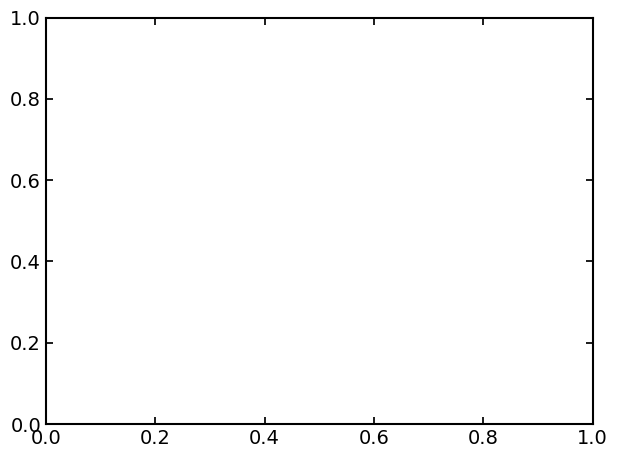

In [23]:
scatter_mean('a_i', 'imag_forced_cmodel', i_bins, 'i_new')

## Absorption data ##

Absorption, denoted ```a_x```, measures the "degree of cloudiness" in the ```x```-band. Absorption ranges from 0 to 1 and the higher the value is, the more reflecting medium there is along the light of sight to the position on the sky. Data with high a usually needs to be eliminated. Below are some plots on the absorption data. 

A histogram of absorption in the grizy spectrum.

In [60]:
object_id = df['object_id']

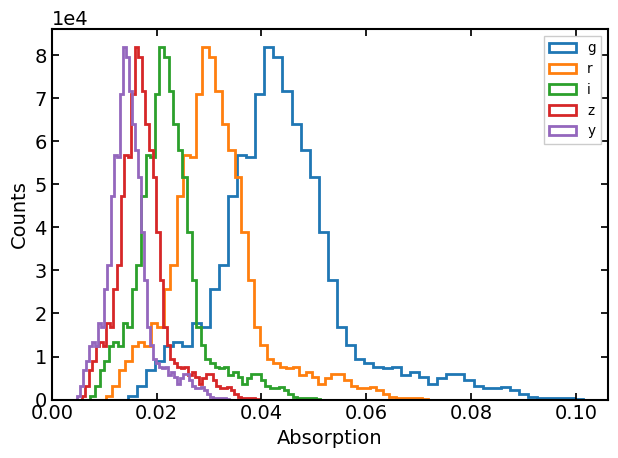

In [6]:
a_g = df['a_g']
a_r = df['a_r']
a_i = df['a_i']
a_z = df['a_z']
a_y = df['a_y']

bins = 50 
fig, axes = plt.subplots(1, 1)
g_hist = axes.hist(a_g, bins=bins, histtype='step', linewidth=2, label='g')
r_hist = axes.hist(a_r, bins=bins, histtype='step', linewidth=2, label='r')
i_hist = axes.hist(a_i, bins=bins, histtype='step', linewidth=2, label='i')
z_hist = axes.hist(a_z, bins=bins, histtype='step', linewidth=2, label='z')
y_hist = axes.hist(a_y, bins=bins, histtype='step', linewidth=2, label='y')

axes.set_xlabel('Absorption')
axes.set_ylabel('Counts')
axes.legend()

Just the i-band data, since I will be dealing with it. 56 is chosen so that each band is 0.001 from the one before.

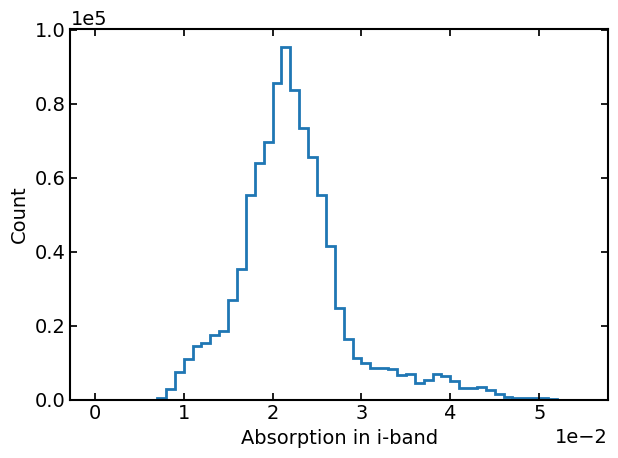

In [7]:
i_bins = np.linspace(0, 0.055, 56)
make_hist('a_i', i_bins, 'Absorption in i-band', 'Count', 'linear', 'linear')

Absorption as a function of position on the sky, darker red indicates more cloudy. At all bands, the distribution should look the same.

Text(0.5, 0, 'i-band Absorption')

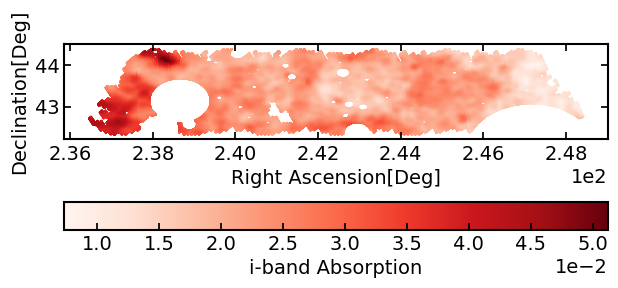

In [8]:
fig, ax = plt.subplots(1, 1)
a_i_scatter_plot = ax.scatter(df['ira'], df['idec'], s=0.1, c=a_i, cmap='Reds')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(a_i_scatter_plot, orientation="horizontal")
cbar.ax.set_xlabel("i-band Absorption")

## Kron? Cmodel? ##

Kron and Cmodel are methods of photometry, I don't understand their differences but I was told that Cmodel is generally more accurate Kron, forced is more accurate than not forced. 

**Ask Professor Mandelbaum what's "forced" again on Thursday.**

Histogram on the Kron flux. The smaller the flux, the dimmer the object is. We observe more dim objects as compared to bright objects so it's an exponential fall-off. **Why are there negative fluxes?**

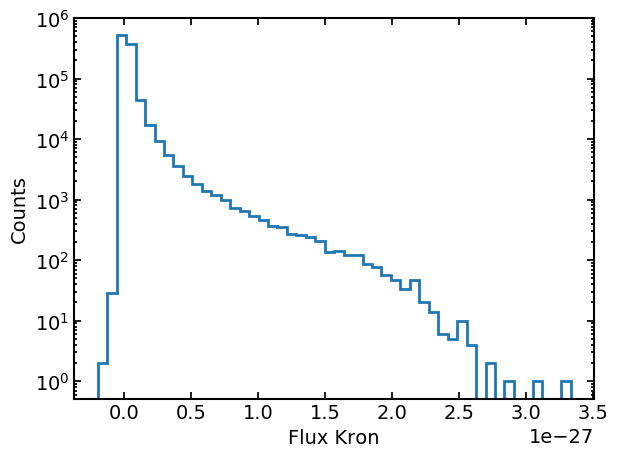

In [9]:
make_hist('iflux_kron', 50, 'Flux Kron', 'Counts', 'linear', 'log')

Histogram on the forced Kron magnitude and the forced Cmodel magnitudein linear in log plot. The rising edge looks the same while the falling edge of Cmodel is quicker. The error message was because of some nan objects that I'm reluctant to change before knowing the data better.

In [46]:
flux_kron = df['iflux_kron']
flux_kron_err = df['iflux_kron_err']
flux_kron_flags = df['iflux_kron_flags']

imag_kron = df['imag_kron']
imag_kron_err = df['imag_kron_err']
imag_forced_kron = df['imag_forced_kron']
imag_forced_kron_err = df['imag_forced_kron_err']

imag_forced_cmodel = df['imag_forced_cmodel']
imag_forced_cmodel_err = df['imag_forced_cmodel_err']

/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/tzhuang/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp

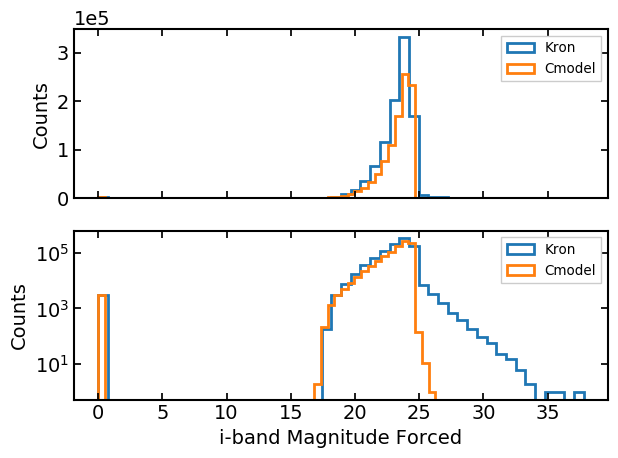

In [47]:
fig, axes = plt.subplots(2, 1, sharex=True)
imag_forced_kron_hist = axes[0].hist(imag_forced_kron, bins=50, histtype='step', linewidth=2, label='Kron')
imag_forced_cmodel_hist = axes[0].hist(imag_forced_cmodel, bins=50, histtype='step', linewidth=2, label='Cmodel')
axes[0].set_ylabel('Counts')
axes[0].legend()

imag_forced_kron_hist_log = axes[1].hist(imag_forced_kron, bins=50, histtype='step', linewidth=2, label='Kron')
imag_forced_cmodel_hist_log = axes[1].hist(imag_forced_cmodel, bins=50, histtype='step', linewidth=2, label='Cmodel')
axes[1].set_xlabel('i-band Magnitude Forced')
axes[1].set_ylabel('Counts')
axes[1].legend()
axes[1].set_yscale('log')

We can also plot the Kron and Cmodel magnitude with position to see where they do or do not agree. We can plot a color plot of their differences and check where they don't agree the most:
**DO NOT run these blocks again! Takes too long!**

In [76]:
imag_diff = np.abs(imag_forced_kron - imag_forced_cmodel)

Text(0.5, 0, 'Difference in Kron and Cmodel i-band magnitude')

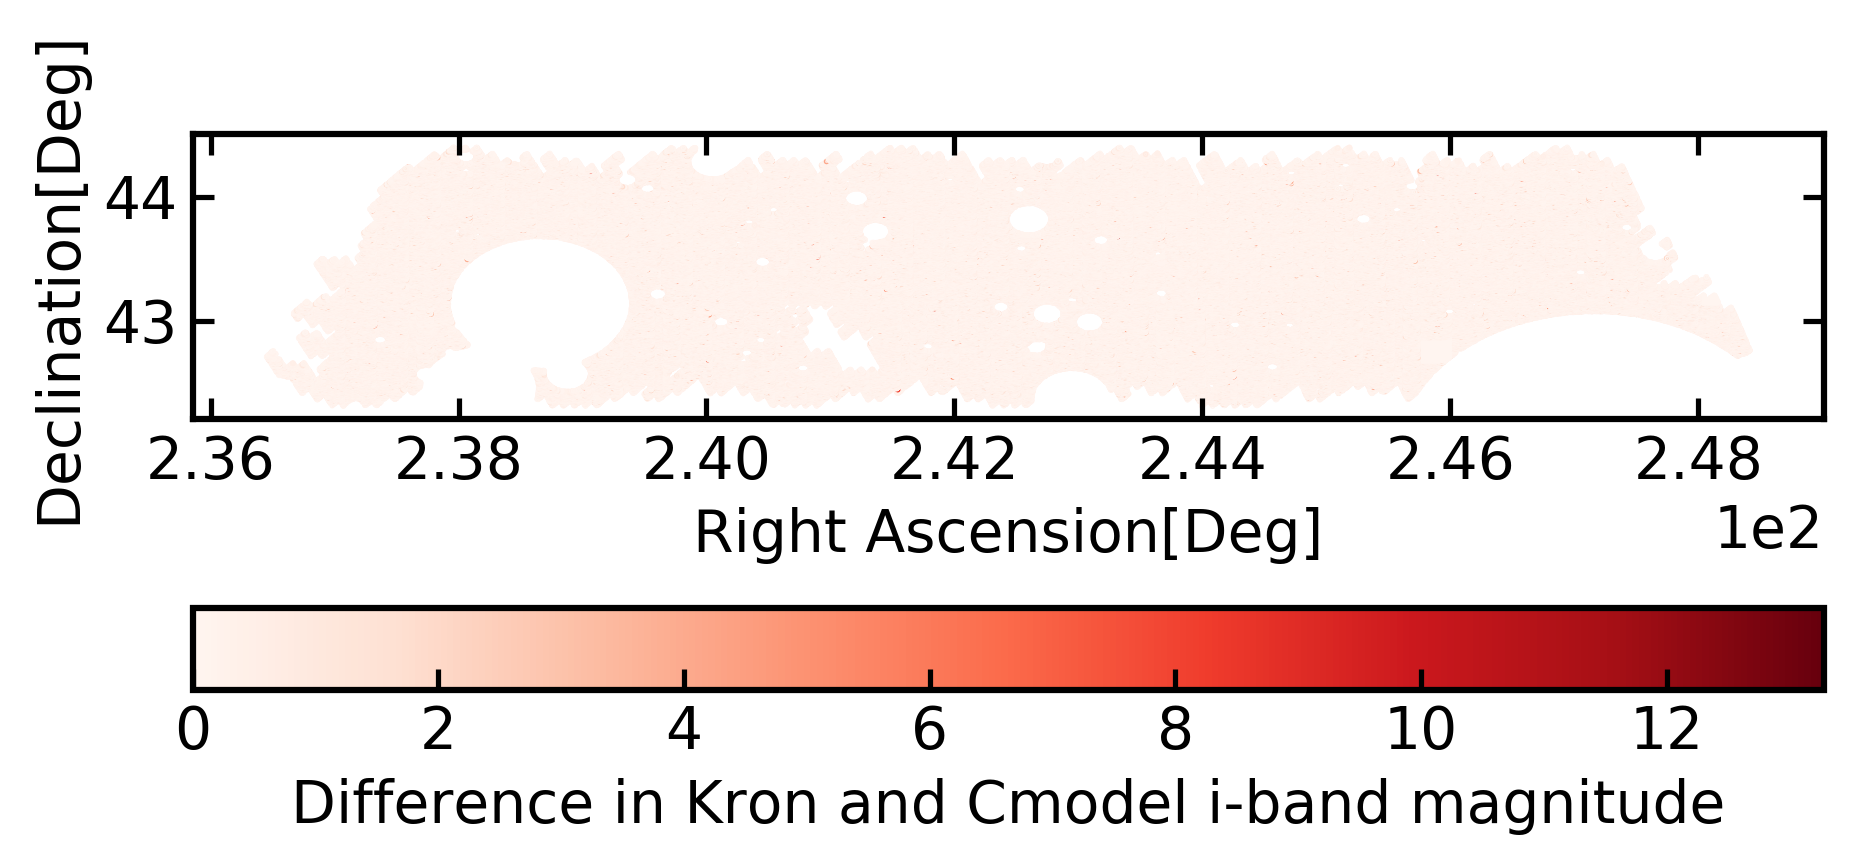

In [75]:
fig, ax = plt.subplots(1, 1, dpi = 300)
imag_diff_plot = ax.scatter(df['ira'], df['idec'], s=0.1, c=imag_diff, cmap='Reds')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(imag_diff_plot, orientation="horizontal")
cbar.ax.set_xlabel("Difference in Kron and Cmodel i-band magnitude")

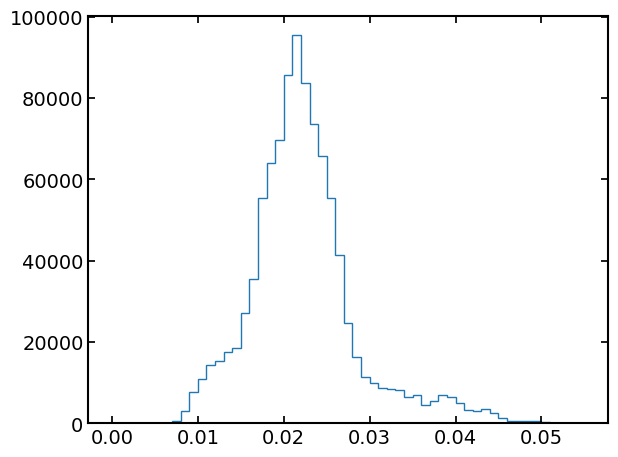

In [81]:
# Move me somewhere else #
i_bins = np.linspace(0, 0.055, 56)
i_digitized = np.digitize(i, i_bins)
bin_means = [i[i_digitized == j].mean() for j in range(1, len(i_bins))]
# plot
fig, axes = plt.subplots(1, 1)
i_digitized_hist = axes.hist(i, bins=i_bins, histtype='step')

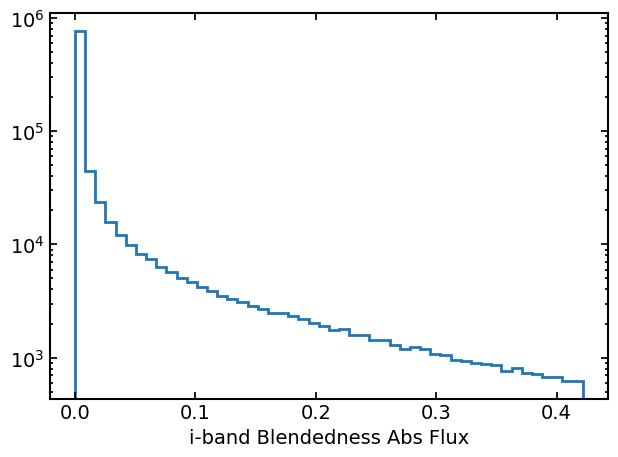

In [6]:
abs_flux = df['iblendedness_abs_flux']
fig, axes = plt.subplots(1, 1)
abs_flux_hist = axes.hist(abs_flux, bins=50, histtype='step', linewidth=2)
axes.set_xlabel('i-band Blendedness Abs Flux')
axes.set_yscale('log')

## Shape data ##
What's derived?

In [32]:
ra = df['ira']
dec = df['idec']
e1 = df['ishape_hsm_regauss_e1']
e2 = df['ishape_hsm_regauss_e2']
sigma = df['ishape_hsm_regauss_sigma']
resolution = df['ishape_hsm_regauss_resolution']

sigma_e = df['ishape_hsm_regauss_derived_sigma_e']
rms_e = df['ishape_hsm_regauss_derived_rms_e']
shape_weight = df['ishape_hsm_regauss_derived_shape_weight']
shear_bias_m = df['ishape_hsm_regauss_derived_shear_bias_m']
shear_bias_c1 = df['ishape_hsm_regauss_derived_shear_bias_c1']
shear_bias_c2 = df['ishape_hsm_regauss_derived_shear_bias_c2']

ixx = df['ishape_sdss_ixx']
iyy = df['ishape_sdss_iyy']
ixy = df['ishape_sdss_ixy']

psf_ixx = df['ishape_sdss_psf_ixx']
psf_iyy = df['ishape_sdss_psf_iyy']
psf_ixy = df['ishape_sdss_psf_ixy']

wl_flag = df['weak_lensing_flag']

Every object has the weak lensing flag it seems.

Text(0.5, 0, 'Weak Lensing Flags')

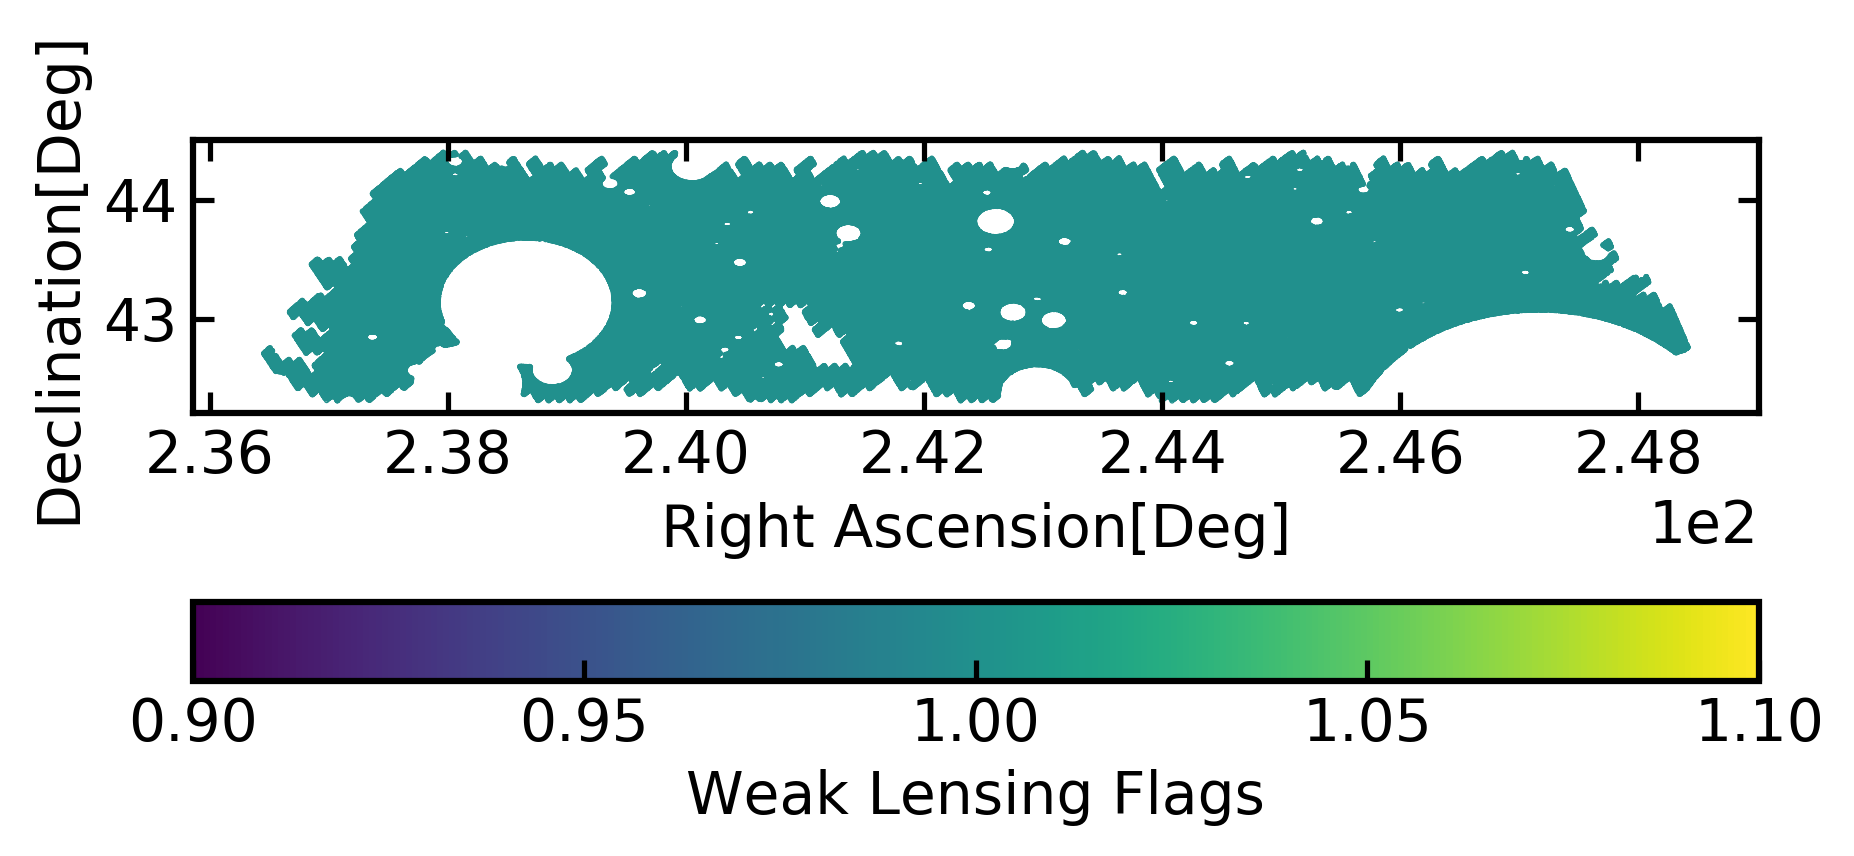

In [26]:
fig, ax = plt.subplots(1, 1, dpi=300)
wl_flag_plot = ax.scatter(df['ira'], df['idec'], s=0.1, c=wl_flag, cmap='viridis')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(wl_flag_plot, orientation="horizontal")
cbar.ax.set_xlabel("Weak Lensing Flags")

The shape weight histogram looks like this. Shape weight means ...

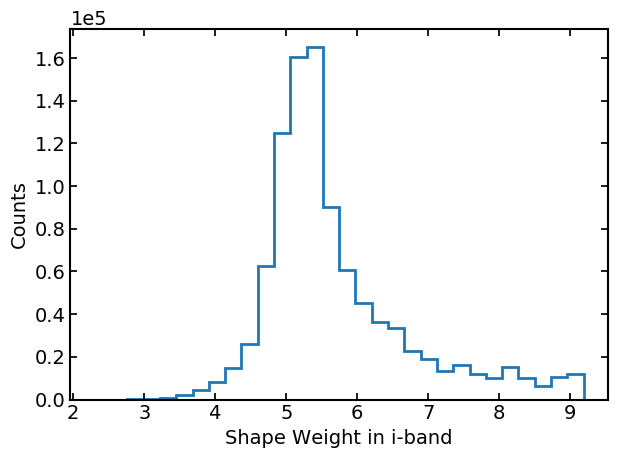

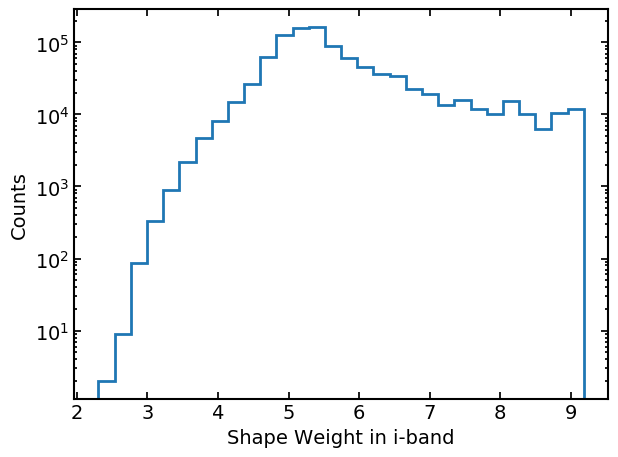

In [30]:
make_hist('ishape_hsm_regauss_derived_shape_weight', 
          30, 'Shape Weight in i-band', 
          'Counts', 'linear', 'linear')
make_hist('ishape_hsm_regauss_derived_shape_weight', 
          30, 'Shape Weight in i-band', 
          'Counts', 'linear', 'log')

Shape weight looks pretty homogeneous on the sky:

Text(0.5, 0, 'Shape Weight')

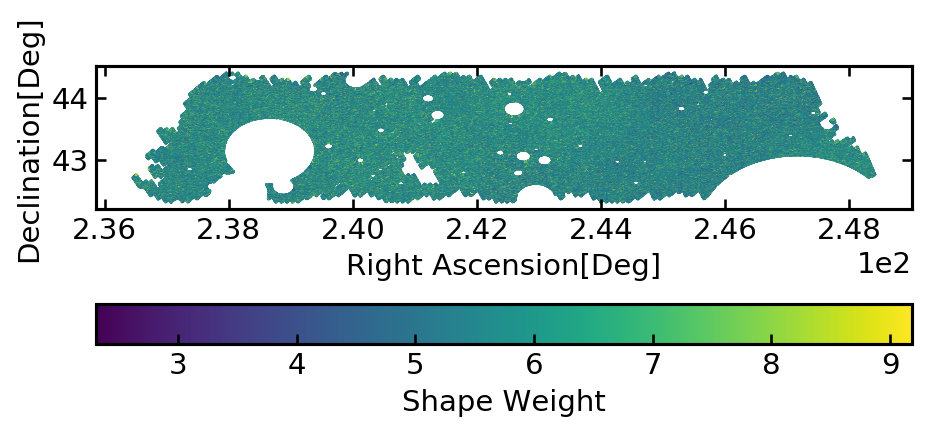

In [31]:
fig = plt.figure(dpi=150)
ax = plt.subplot()
shape_weight_plot = ax.scatter(ra, dec, s=0.1, c=shape_weight, cmap='viridis')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(shape_weight_plot, orientation="horizontal")
cbar.ax.set_xlabel("Shape Weight")

Shear bias m, which is the ...

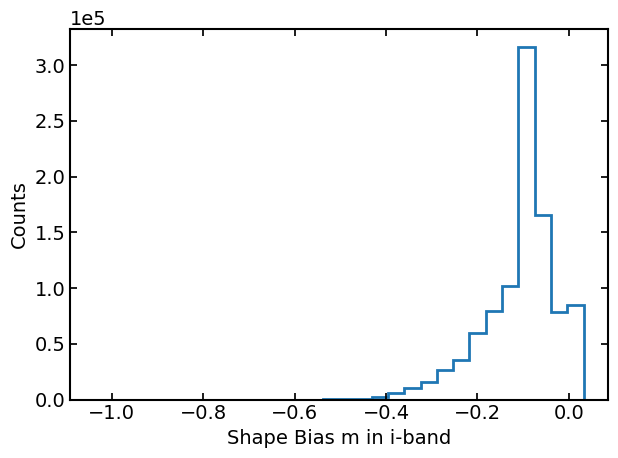

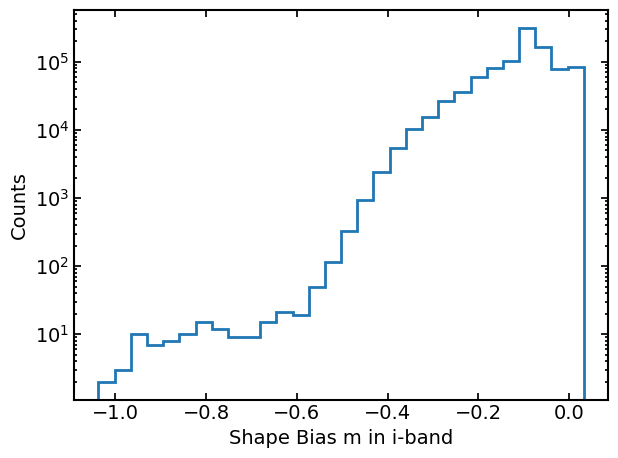

In [35]:
make_hist('ishape_hsm_regauss_derived_shear_bias_m', 
          30, 'Shape Bias m in i-band', 
          'Counts', 'linear', 'linear')
make_hist('ishape_hsm_regauss_derived_shear_bias_m', 
          30, 'Shape Bias m in i-band', 
          'Counts', 'linear', 'log')

This is what c1 and c2 of the shear bias look like:

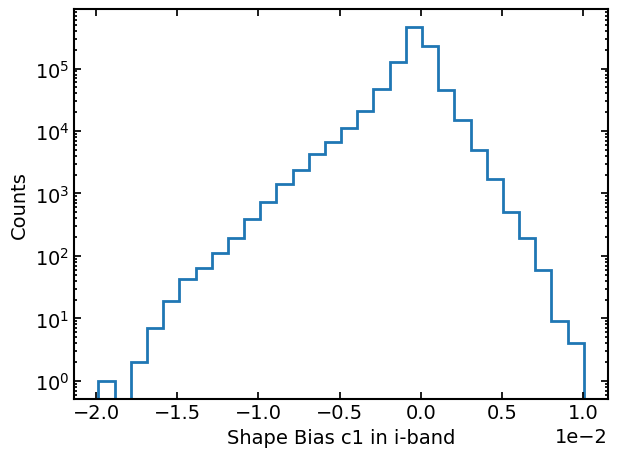

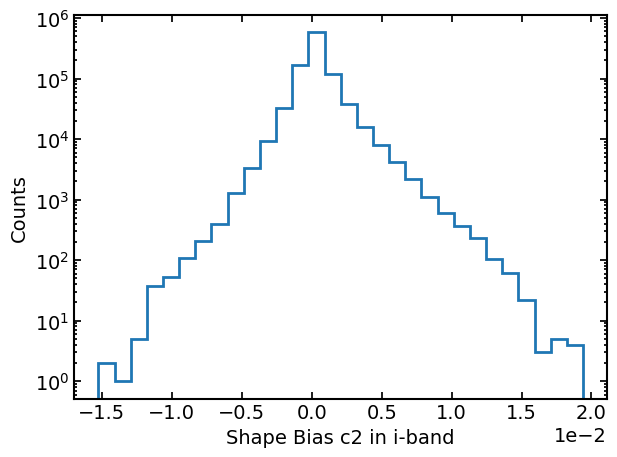

In [37]:
make_hist('ishape_hsm_regauss_derived_shear_bias_c1', 
          30, 'Shape Bias c1 in i-band', 
          'Counts', 'linear', 'log')
make_hist('ishape_hsm_regauss_derived_shear_bias_c2', 
          30, 'Shape Bias c2 in i-band', 
          'Counts', 'linear', 'log')

And I wonder if $c_1^2 + c_2^2$ mean anything.

In [38]:
c = shear_bias_c1**2 + shear_bias_c2**2

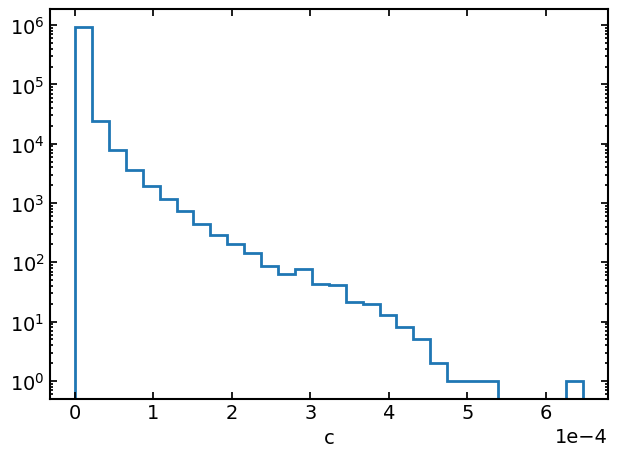

In [40]:
fig, axes = plt.subplots(1, 1, dpi=100)
c_hist = axes.hist(c, bins=30, histtype='step', linewidth=2)
axes.set_xlabel(r'c')
axes.set_yscale('log')

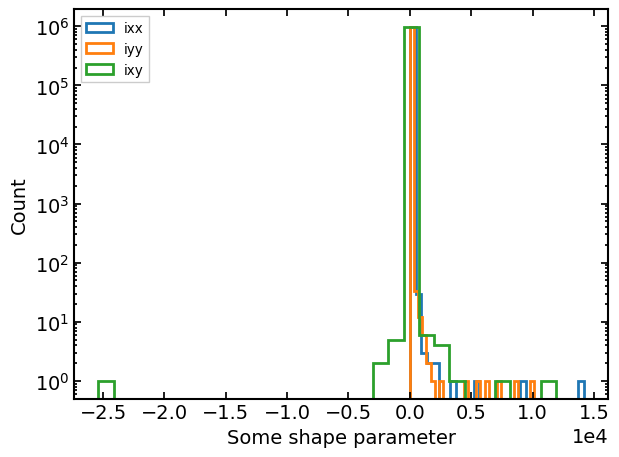

In [57]:
fig, axes = plt.subplots(1, 1, dpi=100)
ixx_hist = axes.hist(np.nan_to_num(ixx), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'ixx')
iyy_hist = axes.hist(np.nan_to_num(iyy), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'iyy')
ixy_hist = axes.hist(np.nan_to_num(ixy), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'ixy')
axes.set_xlabel(r'Some shape parameter')
axes.set_ylabel('Count')
axes.set_yscale('log')
axes.legend()

And we have ixx, iyy, ixy and the PSF-corrected version of everything.

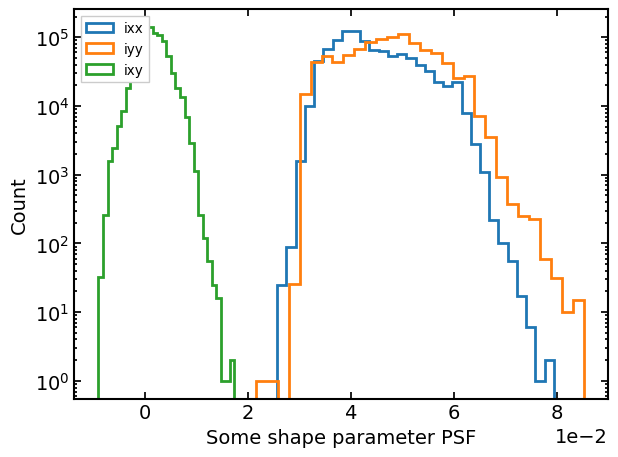

In [58]:
fig, axes = plt.subplots(1, 1, dpi=100)
psf_ixx_hist = axes.hist(np.nan_to_num(psf_ixx), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'ixx')
psf_iyy_hist = axes.hist(np.nan_to_num(psf_iyy), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'iyy')
psf_ixy_hist = axes.hist(np.nan_to_num(psf_ixy), bins=30, 
                     histtype='step', linewidth=2, 
                     label = 'ixy')
axes.set_xlabel(r'Some shape parameter PSF')
axes.set_ylabel('Count')
axes.set_yscale('log')
axes.legend()

And we have the ellipticity  $e_1$ and $e_2$, 

Text(0.5, 0, 'e1')

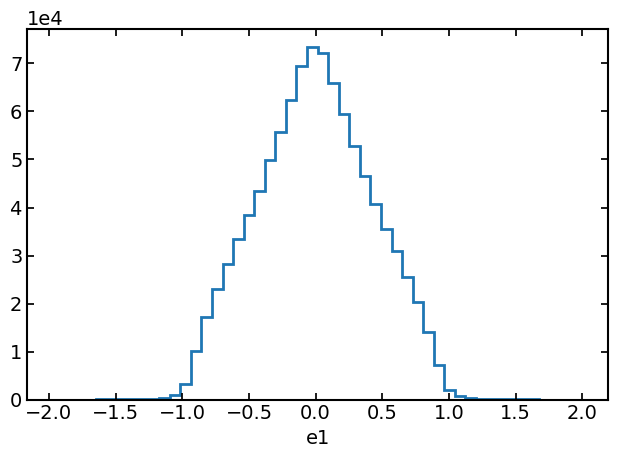

In [61]:
fig, axes = plt.subplots(1, 1, dpi=100)
e1_hist = axes.hist(e1, bins=50, histtype='step', linewidth=2)
axes.set_xlabel(r'e1')

Text(0.5, 0, 'e2')

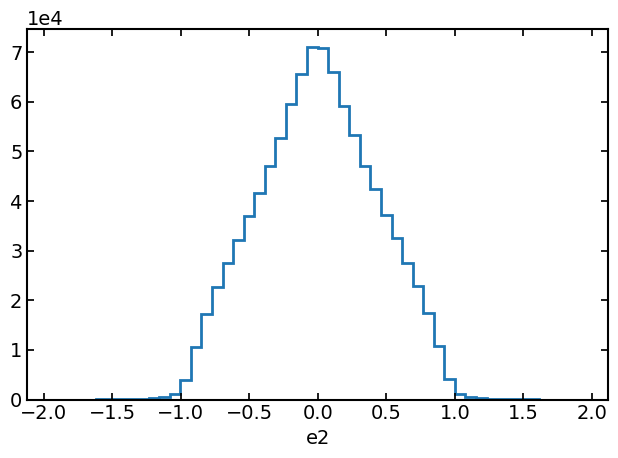

In [62]:
fig, axes = plt.subplots(1, 1, dpi=100)
e2_hist = axes.hist(e2, bins=50, histtype='step', linewidth=2)
axes.set_xlabel(r'e2')

In [64]:
e_sq = e1**2 + e2**2

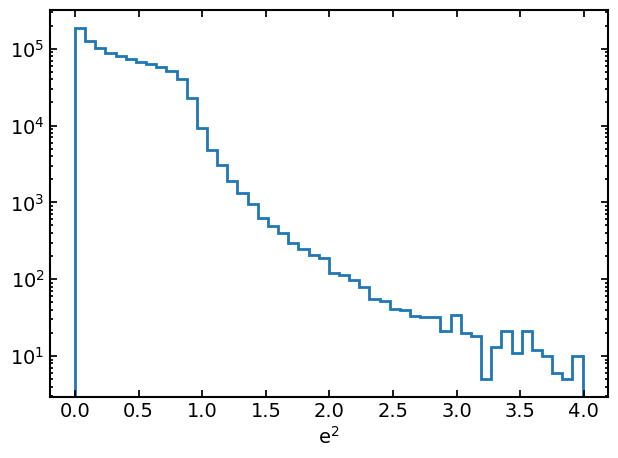

In [66]:
fig, axes = plt.subplots(1, 1, dpi=100)
e_sq_hist = axes.hist(e_sq, bins=50, histtype='step', linewidth=2)
axes.set_xlabel(r'$e^2$')
axes.set_yscale('log')

## Merge Peak? i Count Input? ##
Merge peak is a bianry-valued object. i count input are integers and looks like how the camera sweeps across the sky?

With respect to position on the sky:

Text(0.5, 0, 'Merge Peak in i-band')

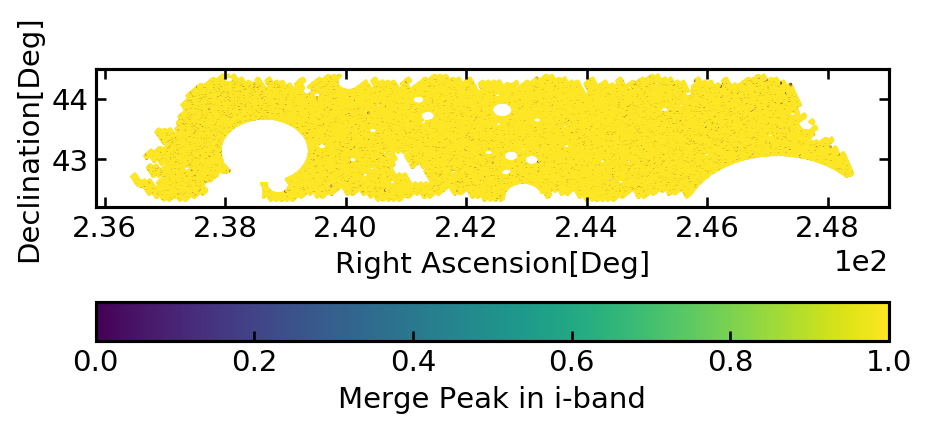

In [43]:
fig = plt.figure(dpi=150)
ax = plt.subplot()
merge_peak_i_plot = ax.scatter(ra, dec, s=0.1, c=df['merge_peak_i'], cmap='viridis')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(merge_peak_i_plot, orientation="horizontal")
cbar.ax.set_xlabel("Merge Peak in i-band")

Text(0.5, 0, 'Count input in i-band')

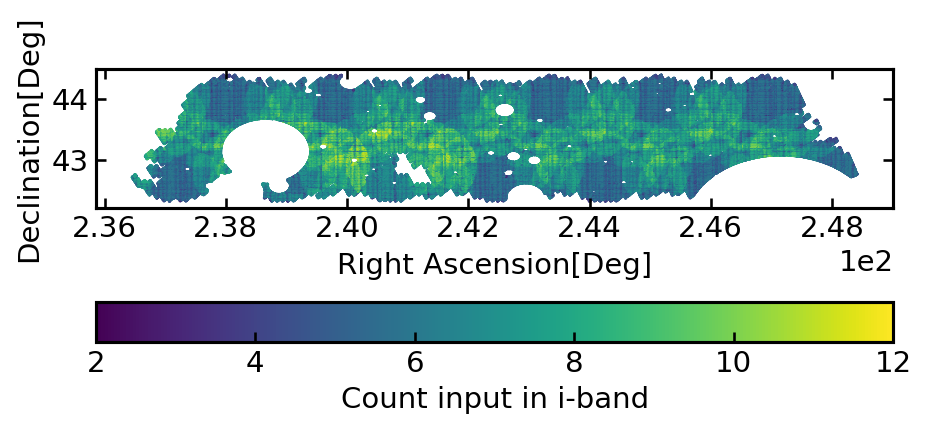

In [45]:
fig = plt.figure(dpi=150)
ax = plt.subplot()
i_count_input_plot = ax.scatter(ra, dec, s=0.1, c=df['icountinputs'], cmap='viridis')
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')
cbar = fig.colorbar(i_count_input_plot, orientation="horizontal")
cbar.ax.set_xlabel("Count input in i-band")

## Zoom in on a patch and make some plots ##

In [13]:
ra_mask = (df['ira'] >= 245) & (df['ira'] <= 245.5)
dec_mask = (df['idec'] >= 43) & (df['idec'] <= 43.5)
mask = ra_mask & dec_mask

In [14]:
df_small = df[mask]

Text(0, 0.5, 'Declination[Deg]')

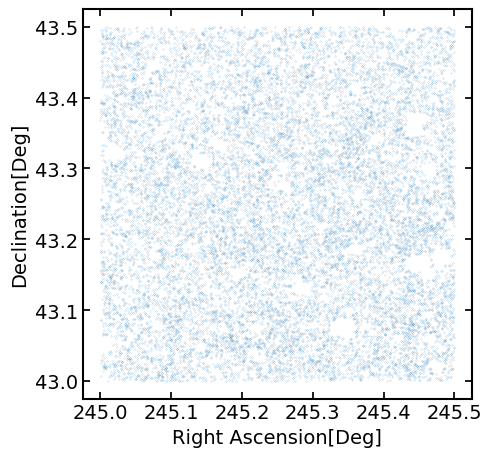

In [15]:
fig = plt.figure()
ax = plt.subplot()
ax.scatter(df_small['ira'], df_small['idec'], s=0.01)
ax.set_aspect("equal")
ax.set_xlabel('Right Ascension[Deg]')
ax.set_ylabel('Declination[Deg]')

5. Elipcity plots

In [21]:
by_parent = df.groupby('parent_id')

In [22]:
by_parent.head()[0:25]

object_id          parent_id         ira       idec    iflux_kron  \
0   69607899311119892                  0  237.626354  42.425013  1.090874e-28   
1   69607899311119987                  0  237.624791  42.426033  1.834707e-29   
2   69607899311120017                  0  237.635024  42.426565  5.931078e-30   
3   69607899311120052                  0  237.617690  42.427464  6.694234e-29   
4   69607899311120090                  0  237.630666  42.427943  7.247885e-30   
68  69607899311140527  69607899311119374  237.636380  42.417753  8.248305e-29   
69  69607899311140641  69607899311119511  237.632032  42.418708  7.526583e-30   
70  69607899311140696  69607899311119588  237.622362  42.422308  2.720928e-28   
71  69607899311140698  69607899311119588  237.621704  42.423120  9.561709e-30   
72  69607899311140858  69607899311119659  237.625781  42.421439  1.709826e-29   
73  69607899311140921  69607899311119728  237.631550  42.422521  7.064186e-29   
74  69607899311140922  69607899311119728  237.629565  42.423698  1.689463e-29   
75  69607899311140926  69607899311119728  237.631465  42.423963  4.982084e-29   
76  69607899311140962  69607899311119762  237.638613  42.423210  3.786401e-29   
77  69607899311140963  69607899311119762  237.639693  42.423735  2.528164e-29   
78  69607899311140965  69607899311119762  237.638421  42.423811  8.145139e-30   
79  69607899311140968  69607899311119762  237.636247  42.422870  1.820067e-29   
80  69607899311141038  69607899311119841  237.642618  42.424026  1.053086e-29   
81  69607899311141070  69607899311119875  237.636165  42.424829  1.146922e-29   
82  69607899311141109  69607899311119926  237.641119  42.425641  1.373066e-29   
83  69607899311141194  69607899311120005  237.619522  42.426441  7.758865e-30   
84  69607899311141254  69607899311120051  237.621582  42.428006  1.349157e-29   
85  69607899311141255  69607899311120051  237.622502  42.427385  6.471277e-30   
86  69607899311141258  69607899311120057  237.625919  42.427400  2.491686e-29   
87  69607899311141259  69607899311120057  237.625594  42.428561  2.967135e-29   

    iflux_kron_err  iflux_kron_flags  imag_kron  imag_kron_err  imag_cmodel  \
0     6.940900e-31             False  21.305563       0.006908    21.294373   
1     7.376951e-31             False  23.241083       0.043655    23.596916   
2     2.856041e-31             False  24.467167       0.052282    24.169138   
3     5.781602e-31             False  21.835747       0.009377    21.817938   
4     4.853736e-31             False  24.249472       0.072709    24.019426   
68    6.407443e-31             False  21.609089       0.008434    21.651546   
69    4.632642e-31             False  24.208506       0.066827    24.196249   
70    8.672067e-31             False  20.313208       0.003460    20.090046   
71    6.092119e-31             False  23.948662       0.069176    24.056152   
72    5.923913e-31             False  23.317619       0.037617    23.500542   
73    1.065247e-30             False  21.777344       0.016372    21.840275   
74    1.229949e-30             False  23.330627       0.079043    24.321413   
75    8.799359e-31             False  22.156471       0.019176    22.519985   
76    4.403441e-31             False  22.454433       0.012627    22.425755   
77    7.044745e-31             False  22.892986       0.030254    23.077888   
78    6.465785e-31             False  24.122753       0.086188    24.343689   
79    8.485791e-31             False  23.249781       0.050621    23.665674   
80    5.987896e-31             False  23.843840       0.061735    23.924829   
81    3.068281e-31             False  23.751165       0.029046    23.700539   
82    4.504997e-31             False  23.555771       0.035623    23.540356   
83    4.398112e-31             False  24.175505       0.061545    24.237194   
84    4.503425e-31             False  23.574844       0.036241    23.603113   
85    3.713656e-31             False  24.372524       0.062307    24.204517   
86    3.7